In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Task 2
### a)

In [2]:
# Grid for beta1 and beta2

b1 = np.linspace(-1, 3, 200)
b2 = np.linspace(-1, 3, 200)
B1, B2 = np.meshgrid(b1, b2)

In [3]:
# Regularization terms

ridge = B1**2 + B2**2
lasso = np.abs(B1) + np.abs(B2)

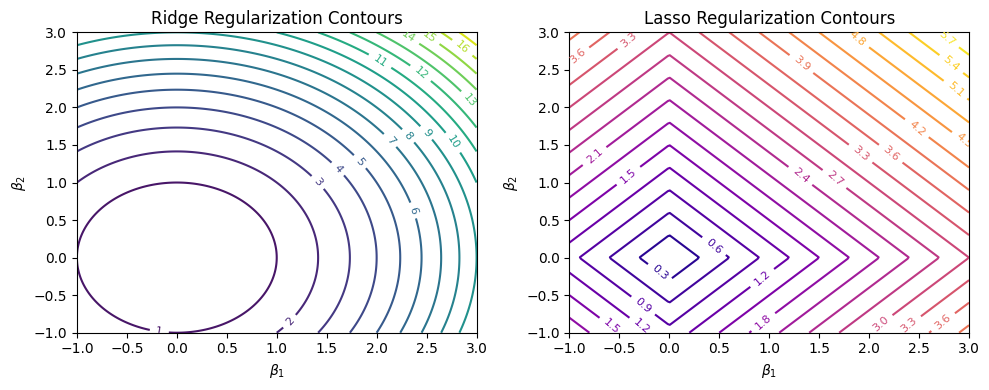

In [4]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10, 4)
                        )
cs1 = axs[0].contour(B1, B2, ridge, levels=20)
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].set_title("Ridge Regularization Contours")
axs[0].set_xlabel(r'$\beta_1$')
axs[0].set_ylabel(r'$\beta_2$')

cs2 = axs[1].contour(B1, B2, lasso, levels=20, cmap='plasma')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].set_title("Lasso Regularization Contours")
axs[1].set_xlabel(r'$\beta_1$')
axs[1].set_ylabel(r'$\beta_2$')


plt.tight_layout()
plt.show()

### b)

x.shape: (2, 100), "y.shape:" (1, 100)


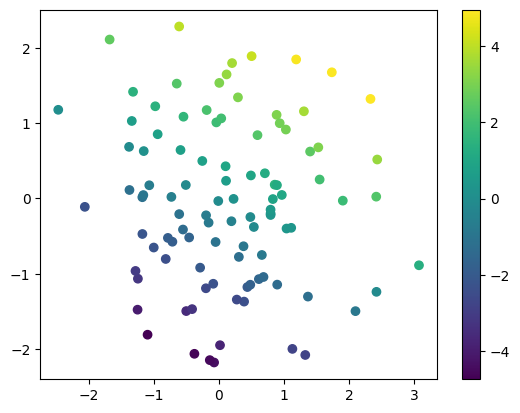

In [5]:
# load the data

data = np.load('data/linreg.npz')
x = data['X']
y = data['Y']

print(f'x.shape: {x.shape}, "y.shape:" {y.shape}')
plt.scatter(*x, c=y)
plt.colorbar()

plt.show()

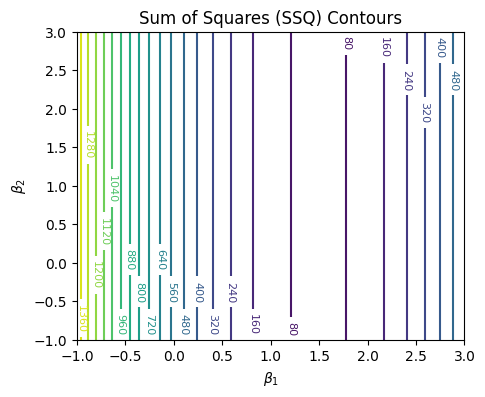

In [6]:
SSQ = np.zeros_like(B1)

x = x.T

# calc SSQ(\beta) = ||y - x\beta||^2
for i in range(B1.shape[0]):
    for j in range(B1.shape[1]):
        beta = np.array([B1[i, j], B1[i, j]])
        xbeta = x @ beta
        SSQ[i, j] = np.sum((y - xbeta) ** 2)

plt.figure(figsize=(5, 4))
cs = plt.contour(B1, B2, SSQ, levels=20)
plt.clabel(cs, inline=True, fontsize=8)
plt.title('Sum of Squares (SSQ) Contours')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')

plt.show()

### c)

In [7]:
lambdas = [0, 10, 50, 100, 200, 300]

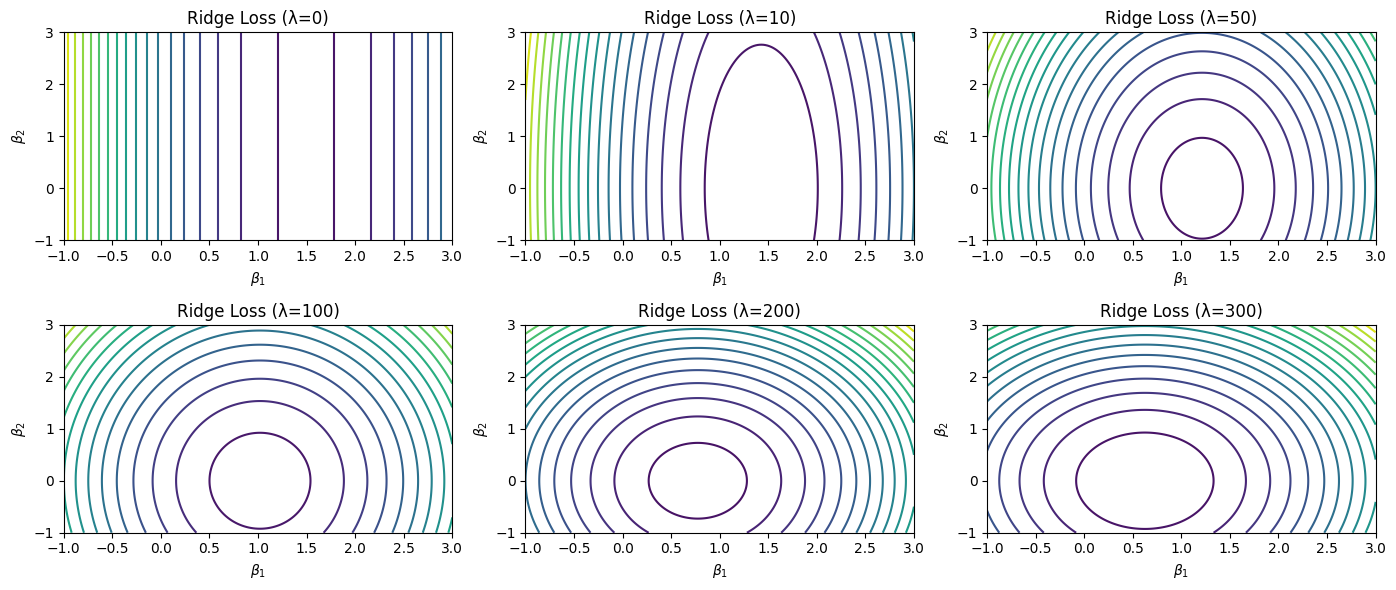

In [8]:
# Ridge

fig, axs = plt.subplots(2, 3, figsize=(14, 6))

for k, lam in enumerate(lambdas):
    row, col = divmod(k, 3)
    L_ridge = SSQ + lam * (B1**2 + B2**2)
    cs = axs[row, col].contour(B1, B2, L_ridge, levels=20)
    axs[row, col].set_title(f'Ridge Loss (λ={lam})')
    axs[row, col].set_xlabel(r'$\beta_1$')
    axs[row, col].set_ylabel(r'$\beta_2$')

plt.tight_layout()
plt.show()

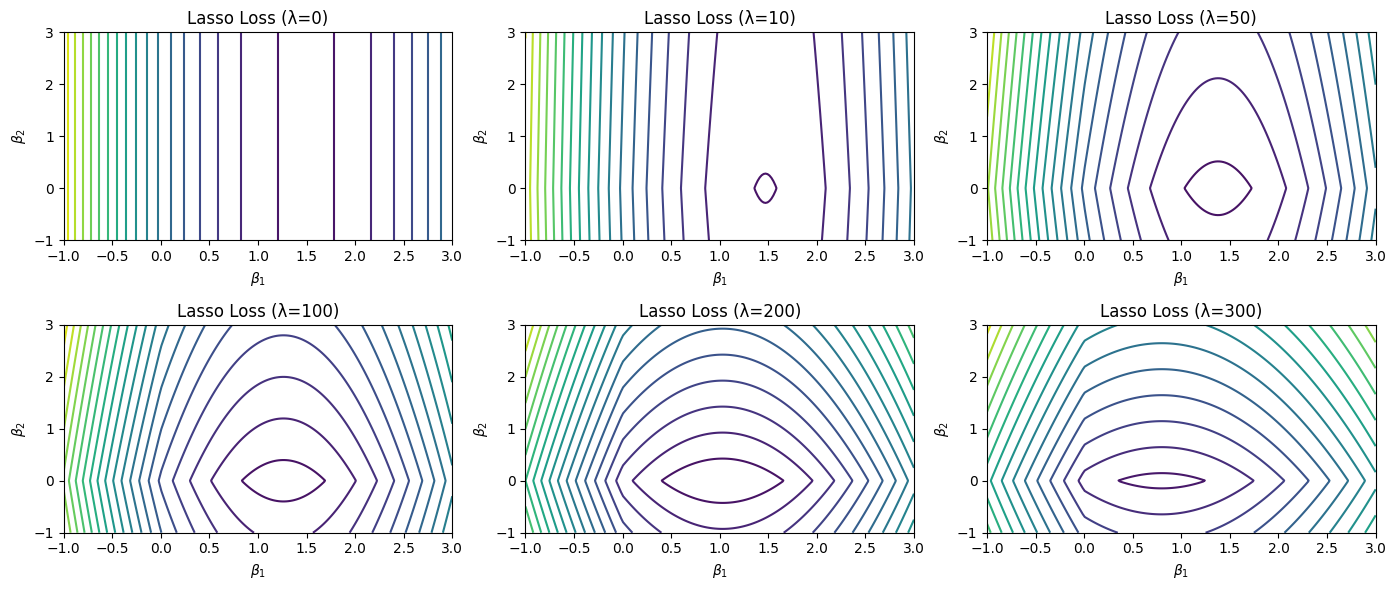

In [9]:
# Lasso
fig, axs = plt.subplots(2, 3, figsize=(14, 6))
for k, lam in enumerate(lambdas):
    row, col = divmod(k, 3)
    L_lasso = SSQ + lam * (np.abs(B1) + np.abs(B2))
    cs = axs[row, col].contour(B1, B2, L_lasso, levels=20)
    axs[row, col].set_title(f'Lasso Loss (λ={lam})')
    axs[row, col].set_xlabel(r'$\beta_1$')
    axs[row, col].set_ylabel(r'$\beta_2$')

plt.tight_layout()
plt.show()